Aviva Blonder
STAT 339
Homework 1

# 1. K-nearest-neighbors Classifier.

In [1]:
# make sure all of the plots show up after the code that created them
% matplotlib inline
# first, import all of the necessary packages
import numpy as np
import math
import matplotlib.pyplot as plt

The bulk of the work in the k-nearest-neighbors classifier is calculating the distance between each instance in the training set and each test instance to determine how to classify the instances in the test set. First, I will create a function that calculates the Euclidian distance between the features of any two instances.

In [2]:
def Euclidiandist(inst1, inst2):
    """Calculates the Euclidian distance between the features of two instances."""
    
    # I should be able to use numpy to do this in one line for instances with arbitrary numbers of features
    return math.sqrt(np.sum((inst1[1:]-inst2[1:])**2))

Next, I will create a function that takes an instance, a training set, and a value of k, and returns whether the label predicted for the instance is correct or incorrect.

In [3]:
def distcalc(newinst, trainset, k):
    """Returns returns true if the label predicted for newinst using trainset and the provided value of k is correct
    and false otherwise."""
    
    # first, I'll use numpy's apply_along_axis function to get a list of distances between newinst and each instance in the training set
    dist = np.apply_along_axis(Euclidiandist, 1, trainset, newinst)
    
    # now I need to find the k smallest values in the list of distances
    # to do so, I'll use numpy's argsort function, which will return the indices in ascending order
    distsort = np.argsort(dist)
    # then I can take the first k training instances and count up the votes
    # because the only options are 1 and -1, I can add them up and make the prediction based on whether the result is positive or negative
    d = distsort[:k+1]
    if np.sum(trainset[d, 0]) > 0:
        pred = 1
    # there can't be a tie because we're only using odd values of k, so I can just use an else statement
    else:
        pred = -1
    
    # if the predicted label is the same as the actual label, return 0, otherwise return 1 (for easy addition)
    if pred == newinst[0]:
        return 0
    else:
        return 1

Now that the classifier has been created, it's time to test it. This function will take in a training set, a test set, and a given value of k, and return the number of instances in the test set that were misclassified.

In [4]:
def test(trainset, testset, k):
    """Classifies each instance in trainset based on testset and k, returns the number of instances which were mislabeled"""
    
    # run distcalc on each instance in the testset to get a list of 1s and 0s indicating whether they were classified correctly or not
    predictions = np.apply_along_axis(distcalc, 1, testset, trainset, k)
    # add up all the values in predictions to return the number of ones - the number of misclassified instances
    return np.sum(predictions)/testset.shape[0]

Before testing the classifier on the final test set, I will use K-fold cross-validation to choose the best value of k. To do so, I will create a function that can take in any training set, split it into 10 folds, and use each of them to test the remainder of the training set for a wide range of values of k.

In [5]:
def validation(trainset, k):
    """Caculates and returns the average misclassification rate for a given value of k over 10-folds."""
    
    # to create 10-folds, first I need to determine where to split trainset
    foldsize = trainset.shape[0]/10
    # the training set may not evenly divide into 10, so I need to get the base size and the number of instances leftover
    basesize = int(foldsize)
    leftovers = (foldsize-basesize)*10
    # variables to hold the start and end of each fold
    foldstart = 0
    foldend = 0
    # and another variable for the running total of instances misclassified
    misclassified = 0
   
    # now to test the classifier with each fold
    for fold in range(10):
        # if fold is less than the number of extra instances, one of them gets included in this fold
        if fold < leftovers:
            foldend += basesize + 1
        # otherwise just add the normal number of instances
        else:
            foldend += basesize
        # create the training set for this fold
        trainfold = np.append(trainset[:foldstart], trainset[foldend:], 0)
        # and the test set
        testfold = trainset[foldstart:foldend]
        
        # test the classifier and add the number of misclassifications to misclassified using the test function
        misclassified += test(trainfold, testfold, k)
        
        # set foldstart equal to foldend for the next fold
        foldstart = foldend
        
    # return the misclassification rate
    return misclassified/10

I'll be evaluating the classifier on the training set, 10-fold cross-validation, and test set for a wide range of values of k. This function will enable me to do that for each data set with a single function call.

In [6]:
 def evaluate(trainset, testset, step):
    """Evaluates the classifier on the provided training and test sets for all possible odd values of k, and plots the results."""
        
    # shuffle the trainset so validattion isn't performed in the original order
    # seed random so it doesn't perform differently each time
    np.random.seed(1)
    np.random.shuffle(trainset)

        
    # lists containing the possible odd values of k, from 1 to the number of instances in the training set
    kvals = range(5, trainset.shape[0]+1, step)
    # and the results of evaluating the classifier on the training set as is
    trainresults = []
    # and with 10-fold cross-validation
    validresults = []
    # and evaluating the classifier on the test set
    testresults = []
    # and the possible values of k for validation
    validks = []
        
    # for each possible odd value of k, evaluate the classifier
    for k in kvals:
        # first evaluate it on trainset as is
        trainresults.append(test(trainset, trainset, k))
        # then, if k is less than 9/10 of the size of the trainset, evaluate it using 10-fold cross-validation 100
        if k < .9*trainset.shape[0] - 1:
            validks.append(k)
            validresults.append(validation(trainset, k))
        # lastly, evaluate it on the test set
        testresults.append(test(trainset, testset, k))
    
    # plot the results!
    plt.plot(kvals, trainresults, 'r', validks, validresults, 'b', kvals, testresults, 'g')
    plt.xlabel("Value of k")
    plt.ylabel("Misclassification Rate")
    plt.legend(["training set", "validation", "test set"])
    plt.show()

Finally, it's time to evaluate the performance of the k-nearest-neighbors classifier on the first data set, where the data is distributed simply.

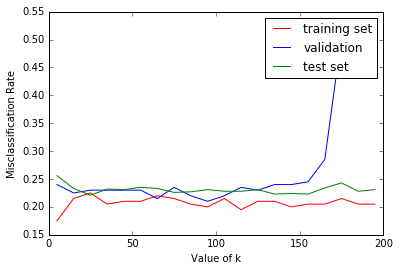

In [7]:
# load the training and test sets into numpy arrays from the designated files
trainset1 = np.loadtxt("S1train.csv", delimiter = ',')
testset1 = np.loadtxt("S1test.csv", delimiter = ',')

evaluate(trainset1, testset1, 10)

For comparison, the second data set is drawn from a more complex distribution.

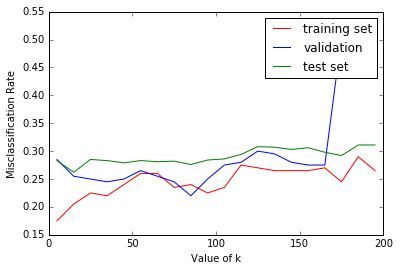

In [8]:
trainset2 = np.loadtxt("S2train.csv", delimiter = ',')
testset2 = np.loadtxt("S2test.csv", delimiter = ',')

evaluate(trainset2, testset2, 10)

As these figures demonstrate, on the whole the classifier performed better on the first, less complex data set for most values of k. The complexity of the data set also impacted the optimal value of k based on the results of 10-fold cross-validation. In the second, more complex data set, it is clear that the optimal value of k is a little bit below 100 - around 80. In the first, less complex data set, the optimal value of k is less clearly apparent, though it seems to be  either just above 50, or just below 100. In both cases, the optimal value of k is between 50 and 100.

# 2. K-nearest-neighbors Classifier for Digits.

Now, I will use the classifier I created above to classify images of handwritten digits. First, I need to load the files into numpy arrays. The images have been split into training sets and testing sets of fives and nines.

In [9]:
# first the 9s
train9s = np.loadtxt("Train9.csv", delimiter = ',', skiprows = 1)
test9s = np.loadtxt("Test9.csv", delimiter = ',', skiprows = 1)
# then the 5s
train5s = np.loadtxt("Train5.csv", delimiter = ',', skiprows = 1)
test5s = np.loadtxt("Test5.csv", delimiter = ',', skiprows = 1)

## a) Visualize one digit from each set.

Each line of the data sets I just loaded was a 28X28 image that has been flattened. To make sure nothing broke in the process, I'm going to reshape the first line of each file into its original form and visualize it, starting with the nines.

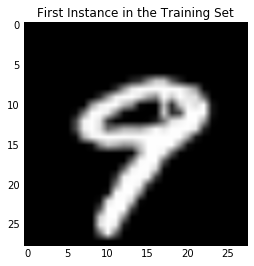

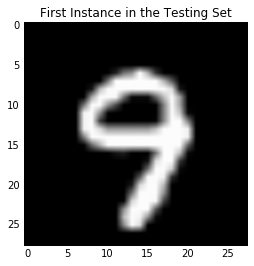

In [10]:
# the first line of the training set of nines, as a 28X28 image
plt.imshow(np.reshape(train9s[1], (28, 28)), cmap = 'gray')
plt.title("First Instance in the Training Set")
plt.show()

# and the first line of the testing set of nines
plt.imshow(np.reshape(test9s[1], (28, 28)), cmap = 'gray')
plt.title("First Instance in the Testing Set")
plt.show()

And now the fives:

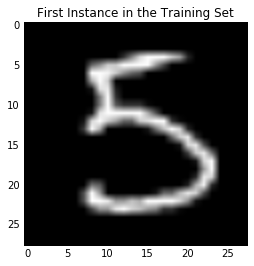

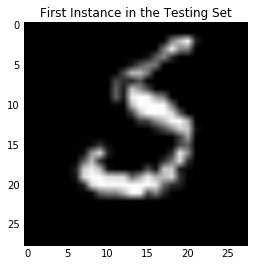

In [11]:
# the first line of the training set of fives, as a 28X28 image
plt.imshow(np.reshape(train5s[1], (28, 28)), cmap = 'gray')
plt.title("First Instance in the Training Set")
plt.show()

# and the first line of the testing set of fives
plt.imshow(np.reshape(test5s[1], (28, 28)), cmap = 'gray')
plt.title("First Instance in the Testing Set")
plt.show()

## b) Apply the K-nearest-neighbors Classifier.

Now that I know the data is good, I can evaluate the classifier on the data set. But first, I need to get the data in order so that the two data sets can be evaluated as one.

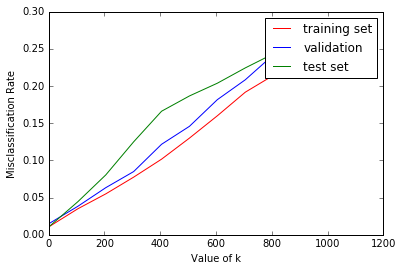

In [12]:
# Labels need to be added to the data sets individually before they can be merged
# For convenience, I'll label nines as ones and fives as negative ones
modtrain9s = np.insert(train9s, 0, np.ones(train9s.shape[0]), 1)
modtest9s = np.insert(test9s, 0, np.ones(test9s.shape[0]), 1)
modtrain5s = np.insert(train5s, 0, np.negative(np.ones(train5s.shape[0])), 1)
modtest5s = np.insert(test5s, 0, np.negative(np.ones(test5s.shape[0])), 1)

# now to merge the training sets and testing sets so the fives and nines can be sent into the classifier together
digtrainset = np.append(modtrain9s, modtrain5s, axis = 0)
digtestset = np.append(modtest9s, modtest5s, axis = 0)

# Finally, evaluate the classifier and show the results
evaluate(digtrainset, digtestset, 100)